In [3]:
from google.colab import drive
import os
import zipfile
import numpy as np

drive.mount('/content/drive')


dataset_zip_path = "/content/drive/MyDrive/MOT16.zip"
extract_path = "/content/MOTS"

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted to:", extract_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset extracted to: /content/MOTS


In [5]:
train_path = os.path.join(extract_path, "train")

# Parse ground truth file
def parse_gt_file(file_path):
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split(',')
            if len(parts) >= 6:
                frame = int(parts[0])
                obj_id = int(parts[1])
                bb_left = int(parts[2])
                bb_top = int(parts[3])
                bb_width = int(parts[4])
                bb_height = int(parts[5])
                data.append([frame, obj_id, bb_left, bb_top, bb_width, bb_height])
    return np.array(data)

# Iterate through all MOT sequences in 'train'
all_gt_data = {}

for mot_sequence in os.listdir(train_path):
    gt_file_path = os.path.join(train_path, mot_sequence, "gt", "gt.txt")

    if os.path.exists(gt_file_path):
        gt_data = parse_gt_file(gt_file_path)
        all_gt_data[mot_sequence] = gt_data
        print(f"Parsed {len(gt_data)} entries from {mot_sequence}/gt.txt")
    else:
        print(f"Ground truth file not found for {mot_sequence}")

# Now, `all_gt_data` is a dictionary where:
# - The keys are the MOT sequences (e.g., 'MOT16-02', 'MOT16-04', etc.).
# - The values are the parsed numpy arrays of ground truth data.

print("All ground truth data parsed successfully!")

Parsed 16929 entries from MOT16-10/gt.txt
Parsed 29193 entries from MOT16-02/gt.txt
Parsed 8830 entries from MOT16-09/gt.txt
Parsed 108005 entries from MOT16-04/gt.txt
Parsed 19263 entries from MOT16-13/gt.txt
Parsed 7671 entries from MOT16-05/gt.txt
Parsed 10076 entries from MOT16-11/gt.txt
All ground truth data parsed successfully!


In [6]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import os
import matplotlib.pyplot as plt

# Define the transformations
color_aug = transforms.Compose([
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5),
    transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
])

# Function to apply augmentation to an image
def augment_image(image_path):
    image = Image.open(image_path).convert("RGB")  # Load image
    augmented_image = color_aug(image)  # Apply augmentation
    return augmented_image


In [7]:
# Define paths
train_path = os.path.join(extract_path, "train")

# Create an augmented folder
augmented_path = os.path.join(extract_path, "augmented_train")
os.makedirs(augmented_path, exist_ok=True)

# Iterate through each sequence in train
for mot_sequence in os.listdir(train_path):
    img_folder = os.path.join(train_path, mot_sequence, "img1")  # Path to images
    aug_folder = os.path.join(augmented_path, mot_sequence)
    os.makedirs(aug_folder, exist_ok=True)

    for img_file in os.listdir(img_folder):
        if img_file.endswith(".jpg"):  # Ensure it's an image
            img_path = os.path.join(img_folder, img_file)
            aug_img = augment_image(img_path)  # Apply augmentation

            # Save the augmented image
            aug_img.save(os.path.join(aug_folder, img_file))

    print(f"Augmented images saved for {mot_sequence}")

print("Data augmentation completed successfully!")


Augmented images saved for MOT16-10
Augmented images saved for MOT16-02
Augmented images saved for MOT16-09
Augmented images saved for MOT16-04
Augmented images saved for MOT16-13
Augmented images saved for MOT16-05
Augmented images saved for MOT16-11
Data augmentation completed successfully!


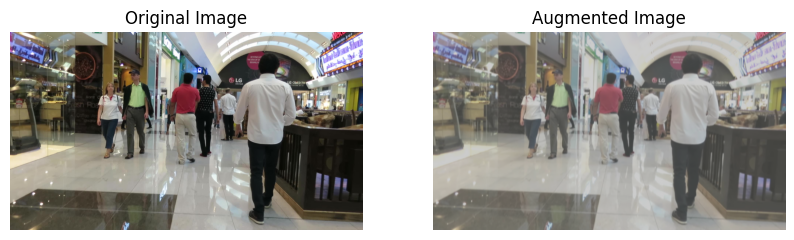

In [9]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image
import os
import random

# Define the augmentation transformations
color_aug = transforms.Compose([
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5),
    transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
])

# Select a sample image from your dataset
train_path = "/content/MOTS/train"  # Adjust based on your setup
mot_sequences = os.listdir(train_path)
sample_mot = random.choice(mot_sequences)  # Pick a random sequence
img_folder = os.path.join(train_path, sample_mot, "img1")
img_files = [f for f in os.listdir(img_folder) if f.endswith(".jpg")]

if img_files:
    sample_img_file = random.choice(img_files)
    sample_img_path = os.path.join(img_folder, sample_img_file)

    # Load the image
    img = Image.open(sample_img_path).convert("RGB")

    # Apply augmentation
    aug_img = color_aug(img)

    # Show original and augmented images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(img)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    axes[1].imshow(aug_img)
    axes[1].set_title("Augmented Image")
    axes[1].axis("off")

    plt.show()
else:
    print("No images found in the dataset.")
